In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

#使用pandas模組讀取excel資料;u表示unicode編碼;sheetname=1表示第二張工作表，0表示第一張;skiprows=3表示前四行略過
df = pd.read_excel(u'K:\\20171027資料前處理\\變數提取\\降水10和降水異類53\\11-降水10降水異類53(樞紐分析).xlsx',sheetname=3)
#顯示前5行資料
df.head(2)

,lon,lat,ID,1644,1645,1646,1647,1648,1649,1650,...,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911
0,121.494508,31.339228,11000,1,0,0,1,4,0,1,...,0,1,0,0,0,0,0,0,0,0
1,121.636161,31.230935,11001,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


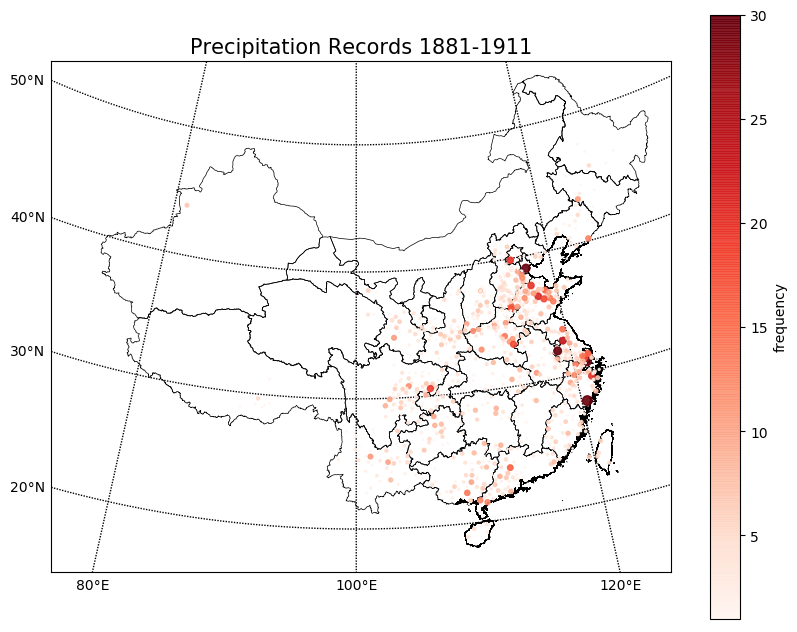

       Stations
Freqs          
0           873
1           233
2           127
3           102
4            88
5            66
6            43
7            36
8            21
9            14
10           11
11            9
12            7
13            3
14            7
15            1
16            4
17            2
18            2
19            2
20            3
21            1
24            1
30            1
33            1
43            1
47            1


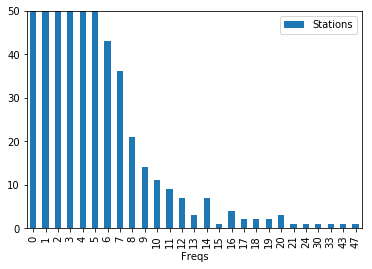

In [2]:
styr = 240
fig = plt.figure(figsize=(10,8),dpi=100)


m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='black')
m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
# 绘制经纬线
m.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1], fontsize=10)

m.fillcontinents('white', 
                 lake_color='white')
numbers = np.sum(df.iloc[:,styr:271],axis=1)
 

lons = list(df.iloc[:,0])
lats = list(df.iloc[:,1])

x1, y1 = m(lons, lats) # Convert coords to projected place in figure
m.scatter(x1, y1, 
          s=np.array(numbers), 
          marker="o", 
          c=numbers,
          cmap='Reds',
          vmin=1,
          vmax=30,    
          zorder=10,
          alpha=0.9)
plt.colorbar(label='frequency')
startyear = styr + 1641
endyear = 1911
plt.title('Precipitation Records '+ str(startyear) + '-' + str(endyear) ,fontsize=15)
plt.show()


dfnb = pd.DataFrame({'Freqs' : numbers,
                     'Stations' : df.iloc[:,2]
                    })

dfnb.head()
print dfnb.groupby('Freqs').count()

dfnb2 = dfnb.groupby('Freqs').count()
dfnb2.plot.bar()
plt.ylim(0, 50)
#plt.bar(dfnb.groupby('FN').count())
#plt.ylabel('Stations')
#plt.xlabel('Frequency')
plt.show()

       Stations
Freqs          
0           873
1           233
2           127
3           102
4            88
5            66
6            43
7            36
8            21
9            14
10           11
11            9
12            7
13            3
14            7
15            1
16            4
17            2
18            2
19            2
20            3
21            1
24            1
30            1
33            1
43            1
47            1


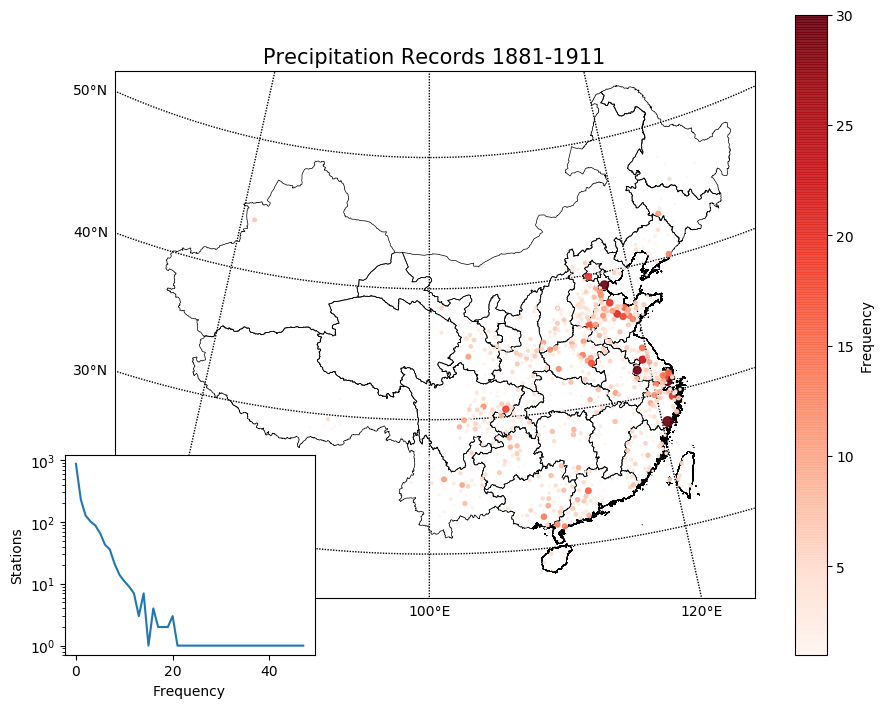

In [3]:
styr = 240
fig = plt.figure(figsize=(10,8),dpi=100)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])

ax1.m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
# 绘制经纬线
ax1.m.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
ax1.m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1], fontsize=10)

ax1.m.fillcontinents('white', 
                 lake_color='white')
numbers = np.sum(df.iloc[:,styr:271],axis=1)
 

lons = list(df.iloc[:,0])
lats = list(df.iloc[:,1])

x1, y1 = m(lons, lats) # Convert coords to projected place in figure
ax1.m.scatter(x1, y1, 
          s=np.array(numbers), 
          marker="o", 
          c=numbers,
          cmap='Reds',
          vmin=1,
          vmax=30,    
          zorder=10,
          alpha=0.9)
plt.colorbar(label='Frequency')
startyear = styr + 1641
endyear = 1911
plt.title('Precipitation Records '+ str(startyear) + '-' + str(endyear) ,fontsize=15)
#plt.show()


dfnb = pd.DataFrame({'Freqs' : numbers,
                     'Stations' : df.iloc[:,2]
                    })

dfnb.head()
print dfnb.groupby('Freqs').count()

left, bottom, width, height = 0.05, 0.1, 0.25, 0.25
ax2 = fig.add_axes([left, bottom, width, height])

dfnb2 = dfnb.groupby('Freqs').count()

ax2.plot(dfnb2)
#dfnb2.plot.bar()
#plt.ylim(0, 50)
ax2.set_yscale('log')
plt.ylabel('Stations')
plt.xlabel('Frequency')
plt.show()
